In [1]:
import os
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from datetime import datetime
import math
import matplotlib
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy.stats import wilcoxon
from scipy.stats import ttest_rel
from scipy.stats import mannwhitneyu
import pickle
#important for text to be detected when importing saved figures into illustrator
matplotlib.rcParams['pdf.fonttype']=42
matplotlib.rcParams['ps.fonttype']=42

In [ ]:
rootpath = r"...\Data\Figure 1 and S1,S2"
figurepath = os.path.join(rootpath,"figure")
metapath = os.path.join(rootpath,"meta")
datapath = os.path.join(rootpath,"data")
moviepath = os.path.join(rootpath,"movie")
statspath = os.path.join(rootpath,"stats")
for x in [figurepath,datapath,statspath]:
    if not os.path.exists(x):
        os.mkdir(x)

In [ ]:
# Excel file to store statistical values for manuscript
manuscript_statistic_filepath = os.path.join(r"...\meta","manuscript_statistic.csv")
manuscript_statistic_file = pd.read_csv(manuscript_statistic_filepath,index_col = False)

# Figure S2B

In [5]:
# Figure label
figlabel = 'FigureS2B'
variable = 'Interaction_zone_entry'


In [6]:
# read data file
group_df = pd.read_csv(os.path.join(datapath,"reexposure_df.csv"),index_col = None)

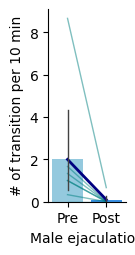

In [7]:

fig,axs = plt.subplots(1,1,figsize = (1,2.5))
sns.lineplot(data = group_df,x = 'Rexposure',y = variable,\
    ax = axs,estimator = None,units = 'ID',sort = True,color = 'teal',alpha = 0.5,lw = 1)
sns.lineplot(data = group_df,x = 'Rexposure',y = variable,\
    ax = axs,err_style= None,alpha =1,lw = 2,color = 'navy')    
sns.barplot(data = group_df,x = 'Rexposure',order  = ['Pre_Ejaculation','Post_Ejaculation'],y = variable,\
    ax = axs,errwidth = 1,palette = ['skyblue','dodgerblue'])
#axs.set_ylim(0,20)
sns.despine()
sns.despine()
axs.set_ylabel('# of transition per 10 min')
axs.set_xticklabels(['Pre','Post'])
axs.set_xlabel('Male ejaculation')
fig.savefig(os.path.join(figurepath,f'{figlabel}.png'),bbox_inches='tight',dpi = 216)
fig.savefig(os.path.join(figurepath,f'{figlabel}.pdf'),bbox_inches='tight')     


In [8]:
#perform Two-way Wilcoxon signed-rank test
group1 = 'Pre_Ejaculation'
group2 = 'Post_Ejaculation'

# Perform Two-way Wilcoxon signed-rank test test
wilcoxon_stats = wilcoxon(
    x=group_df.loc[group_df.Rexposure == group1, variable].values,
    y=group_df.loc[group_df.Rexposure == group2, variable].values
)

# Extract the test statistic and p-value
statistic, pvalue = wilcoxon_stats


print(variable,pvalue)



# Save the Wilcoxon results to a .pickle file
with open(os.path.join(statspath, f'{figlabel}_Wilcoxon.pickle'), 'wb') as handle:
    pickle.dump(wilcoxon_stats, handle, protocol=pickle.HIGHEST_PROTOCOL)

# Determine the sample size for each group (often shown as "n" in non-parametric tests)
n_pre = len(group_df.loc[group_df.Rexposure == group1, variable])
n_post = len(group_df.loc[group_df.Rexposure == group2, variable])

# Append the Wilcoxon result to manuscript_statistic_file
wilcoxon_data = pd.DataFrame([{
    'Figure': figlabel,
    'variable':variable,
    'Type of Test': 'Two-way Wilcoxon signed-rank test',
    'Detail': f'{group1} vs {group2}',
    'statistic description': f'W(n={n_pre}, {n_post})',  # Showing "n" for each group
    'statistic': statistic,
    'p Value': pvalue
}])

# Concatenate to the results DataFrame
manuscript_statistic_file = pd.concat([manuscript_statistic_file, wilcoxon_data], ignore_index=True)

# Show the updated DataFrame
#print(manuscript_statistic_file)

Interaction_zone_entry 0.027281171477617997


c:\Users\stuberadmin\anaconda3\envs\cellpose\lib\site-packages\scipy\stats\_morestats.py:3414: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
c:\Users\stuberadmin\anaconda3\envs\cellpose\lib\site-packages\scipy\stats\_morestats.py:3428: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


# Figure S2C

In [9]:
# Figure label
figlabel = 'FigureS2C'
variable = 'Isolation_zone_avetime'


In [10]:
# read data file
group_df = pd.read_csv(os.path.join(datapath,"reexposure_df.csv"),index_col = None)

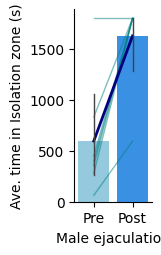

In [11]:

fig,axs = plt.subplots(1,1,figsize = (1,2.5))
sns.lineplot(data = group_df,x = 'Rexposure',y = variable,\
    ax = axs,estimator = None,units = 'ID',sort = True,color = 'teal',alpha = 0.5,lw = 1)
sns.lineplot(data = group_df,x = 'Rexposure',y = variable,\
    ax = axs,err_style= None,alpha =1,lw = 2,color = 'navy')    
sns.barplot(data = group_df,x = 'Rexposure',order  = ['Pre_Ejaculation','Post_Ejaculation'],y = variable,\
    ax = axs,errwidth = 1,palette = ['skyblue','dodgerblue'])
#axs.set_ylim(0,20)
sns.despine()
sns.despine()
axs.set_ylabel('Ave. time in Isolation zone (s)')
axs.set_xticklabels(['Pre','Post'])
axs.set_xlabel('Male ejaculation')
fig.savefig(os.path.join(figurepath,f'{figlabel}.png'),bbox_inches='tight',dpi = 216)
fig.savefig(os.path.join(figurepath,f'{figlabel}.pdf'),bbox_inches='tight')     


In [12]:
#perform Two-way Wilcoxon signed-rank test
group1 = 'Pre_Ejaculation'
group2 = 'Post_Ejaculation'

# Perform Two-way Wilcoxon signed-rank test test
wilcoxon_stats = wilcoxon(
    x=group_df.loc[group_df.Rexposure == group1, variable].values,
    y=group_df.loc[group_df.Rexposure == group2, variable].values
)

# Extract the test statistic and p-value
statistic, pvalue = wilcoxon_stats


print(variable,pvalue)



# Save the Wilcoxon results to a .pickle file
with open(os.path.join(statspath, f'{figlabel}_Wilcoxon.pickle'), 'wb') as handle:
    pickle.dump(wilcoxon_stats, handle, protocol=pickle.HIGHEST_PROTOCOL)

# Determine the sample size for each group (often shown as "n" in non-parametric tests)
n_pre = len(group_df.loc[group_df.Rexposure == group1, variable])
n_post = len(group_df.loc[group_df.Rexposure == group2, variable])

# Append the Wilcoxon result to manuscript_statistic_file
wilcoxon_data = pd.DataFrame([{
    'Figure': figlabel,
    'variable':variable,
    'Type of Test': 'Two-way Wilcoxon signed-rank test',
    'Detail': f'{group1} vs {group2}',
    'statistic description': f'W(n={n_pre}, {n_post})',  # Showing "n" for each group
    'statistic': statistic,
    'p Value': pvalue
}])

# Concatenate to the results DataFrame
manuscript_statistic_file = pd.concat([manuscript_statistic_file, wilcoxon_data], ignore_index=True)

# Show the updated DataFrame
#print(manuscript_statistic_file)

Isolation_zone_avetime 0.027707849358079864


c:\Users\stuberadmin\anaconda3\envs\cellpose\lib\site-packages\scipy\stats\_morestats.py:3414: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
c:\Users\stuberadmin\anaconda3\envs\cellpose\lib\site-packages\scipy\stats\_morestats.py:3428: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


In [13]:
# Write the stats
manuscript_statistic_file.to_csv(manuscript_statistic_filepath,index = False)